<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.976 · Anàlisi de grafs i xarxes socials</p>
<p style="margin: 0; text-align:right;">Màster universitari de Ciència de Dades (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

# Anàlisi de xarxes i detecció de comunitats

A continuació es presentaran explicacions i exemples de càlcul i interpretació de mètriques que es poden aplicar als nodes, a les arestes i a la totalitat de la xarxa en el procés d'anàlisi de xarxes socials, tots ells utilitzant la llibreria networkx. 

Després, es mostren alguns algorismes de detecció de subestructures locals en els grafs, com també algorismes de detecció de comunitats. Finalment, es presenten exemples d'ús d'una de les alternatives més comunes per a avaluar una partició determinada en comunitats d'una xarxa: la modularitat.

Recordeu que podeu anar executant els exemples que s'inclouen en els notebooks per a reproduir-los i obtenir-ne els resultats. A més, us animem a modificar el codi dels exemples i executar les vostres modificacions, per anar explorant tot el potencial de les llibreries que es presenten en els notebooks.


## 1. Mètriques que descriuen els nodes

### 1.1 Mesures de centralitat

En la teoria s'ha ensenyat com calcular una de les mètriques més bàsiques que s'utilitzen per a descriure nodes dins d'una xarxa: el seu grau. El grau és una mètrica que es fa servir per a avaluar la centralitat dels nodes, però no és l'única. La centralitat basada en la intermediació, que quantifica la fracció de camins més curts entre parells de nodes que passen pel node avaluat; la centralitat de proximitat, que quantifica la distància mitjana entre un node i tots els altres nodes accessibles des del primer; i la centralitat del vector propi, que avalua si el node està connectat a altres nodes importants, són també mètriques de centralitat, que podem calcular amb les funcions [`betweenness_centrality`](https://networkx.github.io/documentation/stable/reference/algorithms/centrality.html), [`closeness_centrality`](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.closeness_centrality.html#networkx.algorithms.centrality.closeness_centrality) y [`eigenvector_centrality`](https://networkx.github.io/documentation/stable/_modules/networkx/algorithms/centrality/eigenvector.html).

Per a comprovar les diferències entre les tres mètriques de centralitat, definirem una funció que ens mostrarà visualment un graf, fixant la mida dels nodes segons els valors proporcionats com a paràmetre. Utilitzarem aquesta funció per a mostrar gràficament els valors de les diferents mesures de centralitat sobre grafs petits, per així comparar què avalua cadascuna d'elles.


In [4]:
# Activem matplotlib i indiquem que es mostrin els plots en el mateix notebook
# usant un magic command de jupyter.
%matplotlib inline

# Importem networkx
import networkx as nx

# Importem pyplot
import matplotlib.pyplot as plt

In [5]:
def draw_graph_node_size_prop(g, prop, max_size=500, min_size=20, pos=None, return_pos=False):
    if pos is None:
        pos = nx.kamada_kawai_layout(g)
    # Mostrem cada node, usant com a mida el valor que indica el diccionari prop, 
    # normalitzat en l'interval [min_size, max_size].
    r = float(max(prop.values()) - min(prop.values()))
    r = 1 if r==0 else r
    n, p = zip(*[(no, min_size+(max_size-min_size)*si/r) for no, si in prop.items()])
    nx.draw_networkx_nodes(g, pos=pos, nodelist=n, node_size=p)
    # Mostrem totes les arestes.
    nx.draw_networkx_edges(g, pos=pos)
    
    if return_pos:
        return pos

In [6]:
# Creem tres grafs d'exemple.
g1 = nx.star_graph(5)
g2 = nx.bull_graph()
g3 = nx.balanced_tree(3, 3)

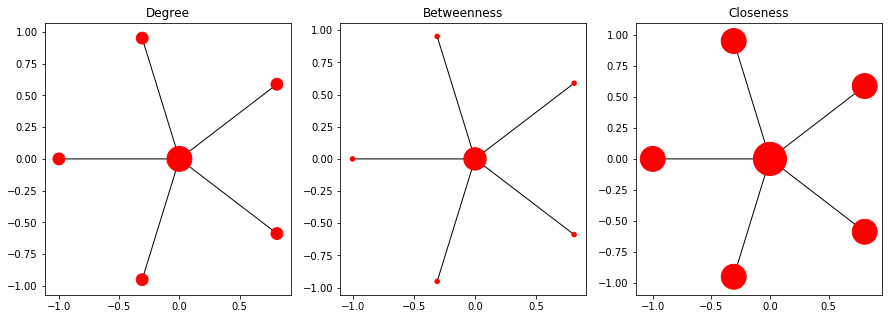

In [8]:
# Creem tres visualitzacions del graf 1, utilitzant la mida dels nodes per a indicar el grau,
# la centralitat d'intermediació i la centralitat de proximitat, respectivament.
plt.figure(num=None, figsize=(15, 5))
       
ax = plt.subplot(1, 3, 1)
ax.set_title("Degree")
draw_graph_node_size_prop(g1, dict(nx.degree(g1)))

ax = plt.subplot(1, 3, 2)
ax.set_title("Betweenness")
draw_graph_node_size_prop(g1, nx.betweenness_centrality(g1))

ax = plt.subplot(1, 3, 3)
ax.set_title("Closeness")
draw_graph_node_size_prop(g1, nx.closeness_centrality(g1))

En un graf en forma d'estrella, sempre hi ha un node amb un grau molt més gran que la resta. Aquest node també té més centralitat d'intermediació, ja que tots els camins entre qualsevol parell de nodes del graf hi passen. En canvi, encara que aquest també té més centralitat de proximitat, la diferència amb la centralitat de proximitat de la resta de nodes no és tan gran.

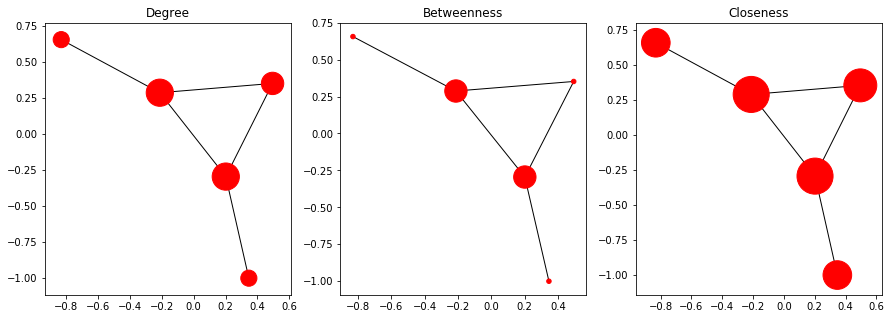

In [9]:
# Creem tres visualitzacions del graf 2, utilitzant la mida dels nodes per a indicar el grau,
# la centralitat d'intermediació i la centralitat de proximitat, respectivament.
plt.figure(num=None, figsize=(15, 5))
       
ax = plt.subplot(1, 3, 1)
ax.set_title("Degree")
draw_graph_node_size_prop(g2, dict(nx.degree(g2)))

ax = plt.subplot(1, 3, 2)
ax.set_title("Betweenness")
draw_graph_node_size_prop(g2, nx.betweenness_centrality(g2))

ax = plt.subplot(1, 3, 3)
ax.set_title("Closeness")
draw_graph_node_size_prop(g2, nx.closeness_centrality(g2))

El node dibuixat més a la dreta de les imatges té grau dos, superior al grau de dos nodes i inferior al dels altres dos. En canvi, la centralitat d'intermediació d'aquest node és molt baixa, ja que els camins més curts entre qualsevol altre parell de nodes mai passen per ell.

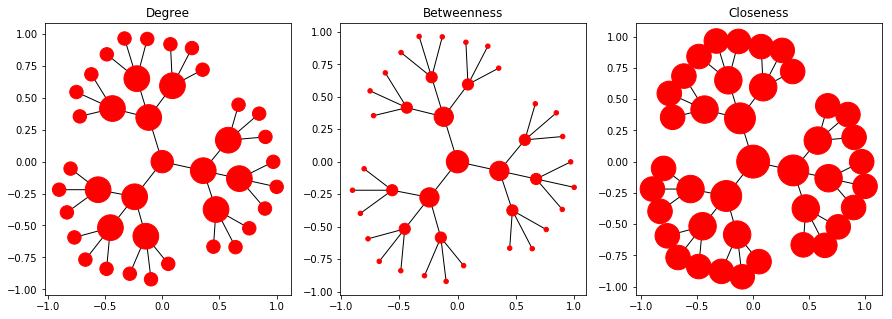

In [10]:
# Creem tres visualitzacions del graf 3, utilitzant la mida dels nodes per a indicar el grau,
# la centralitat d'intermediació i la centralitat de proximitat, respectivament.
plt.figure(num=None, figsize=(15, 5))
       
ax = plt.subplot(1, 3, 1)
ax.set_title("Degree")
draw_graph_node_size_prop(g3, dict(nx.degree(g3)))

ax = plt.subplot(1, 3, 2)
ax.set_title("Betweenness")
draw_graph_node_size_prop(g3, nx.betweenness_centrality(g3))

ax = plt.subplot(1, 3, 3)
ax.set_title("Closeness")
draw_graph_node_size_prop(g3, nx.closeness_centrality(g3))

Els nodes amb més grau (grau quatre) no tenen la centralitat més gran d'intermediació ni de proximitat, que en el cas del graf que es mostra a sobre, és per al node del centre de la imatge (que té grau tres).

In [11]:
# Importem la llibreria copy.
from copy import deepcopy 

# Creem dos grafs d'exemple.
g3 = nx.balanced_tree(3, 3)
g3p = deepcopy(g3)
g3p.add_edges_from([(1,2), (2,3), (3,1)])

El codi anterior utilitza la llibreria [`copy`](https://docs.python.org/2/library/copy.html). Podeu consultar la documentació de la llibreria per veure perquè necessitem fer-ne ús en aquest exemple.


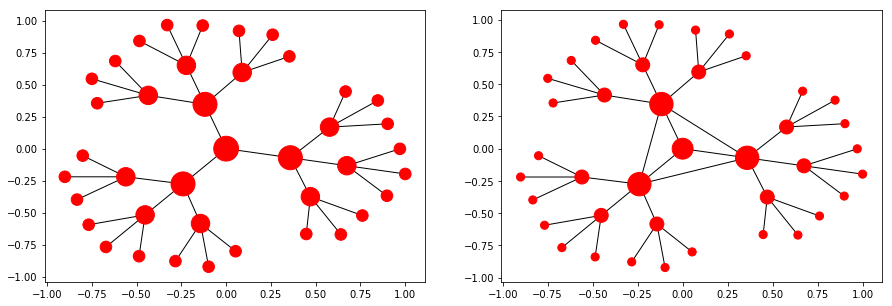

In [12]:
# Creem dues visualitzacions de dos grafs diferents, utilitzant la mida dels nodes per a indicar
# la centralitat del vector propi.
# Nota: observeu que, a diferència de les visualitzacions anteriors, en aquest cas les visualitzacions
# corresponen a grafs diferents (en comptes de ser un sol graf mostrant diverses mètriques).
plt.figure(num=None, figsize=(15, 5))
       
ax = plt.subplot(1, 2, 1)
pos = draw_graph_node_size_prop(g3, nx.eigenvector_centrality(g3), return_pos=True)

ax = plt.subplot(1, 2, 2)
draw_graph_node_size_prop(g3p, nx.eigenvector_centrality(g3p), pos=pos)

Els dos grafs tenen el mateix nombre de nodes i difereixen únicament en l'existència de tres arestes, que connecten els tres nodes que envolten el node del centre de la visualització. En el graf de l'esquerra, els tres nodes amb més centralitat de vector propi són precisament aquests tres nodes, mentre que el node del centre de la imatge té una centralitat inferior. En canvi, en el graf de la dreta, el node amb més centralitat de vector propi és el que es troba al centre de la imatge.

### 1.2 Mesures d'agrupament

El coeficient d'agrupament (o *cc*, per les seves sigles en anglès, *clustering coefficient*) és una altra mètrica que serveix per a descriure nodes, i que quantifica fins a quin punt estan connectats entre ells els veïns d'un node. Vegem-ho amb un exemple, utilitzant la funció [`clustering`](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html#networkx.algorithms.cluster.clustering).

In [13]:
# Creem tres grafs d'exemple.
g4 = nx.complete_graph(4)
g5 = nx.balanced_tree(3, 1)
g6 = deepcopy(g5)
g6.add_edges_from([(1, 2)])

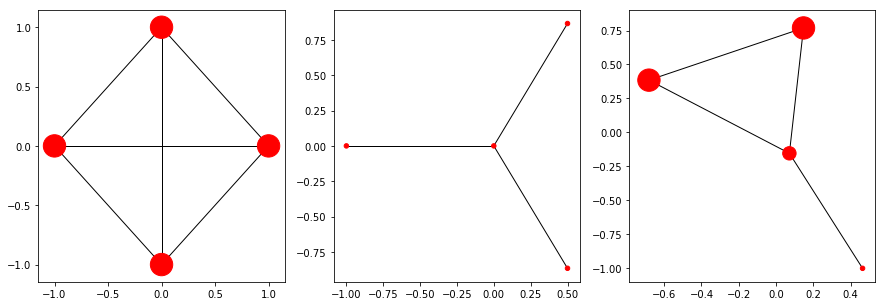

In [14]:
# Creem tres visualitzacions de tres grafs diferents, utilitzant la mida dels nodes per a indicar el
# coeficient d'agrupament.
# Nota: observeu que, a diferència de les visualitzacions de centralitat, en aquest cas les visualitzacions
# corresponen a grafs diferents (en comptes de ser un sol graf mostrant diverses mètriques).
plt.figure(num=None, figsize=(15, 5))
       
ax = plt.subplot(1, 3, 1)
draw_graph_node_size_prop(g4, dict(nx.clustering(g4)))

ax = plt.subplot(1, 3, 2)
draw_graph_node_size_prop(g5, nx.clustering(g5))

ax = plt.subplot(1, 3, 3)
draw_graph_node_size_prop(g6, nx.clustering(g6))


El primer graf és un graf complet, per la qual cosa el coeficient d'agrupament és màxim per a tots els nodes. Per contra, en el segon graf el coeficient d'agrupament és mínim per a tots els nodes, ja que cap node té veïns que estiguin connectats entre ells. Finalment, en el tercer graf, els dos nodes superiors tenen un coeficient d'agrupament màxim, ja que els seus veïns es troben connectats entre si. El node del centre té dos dels seus tres veïns connectats, per la qual cosa el coeficient d'agrupament és 1/3. 

## 2. Mètriques que descriuen les arestes

Networkx també disposa de mètriques de les arestes, com la centralitat basada en la intermediació de les arestes (que es pot calcular amb la funció [`edge_betweenness_centrality`](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.edge_betweenness_centrality.html#networkx.algorithms.centrality.edge_betweenness_centrality)) o la centralitat d'intermediació del flux de corrent (el càlcul del qual implementa la funció [`edge_current_flow_betweenness_centrality`](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.edge_current_flow_betweenness_centrality.html#networkx.algorithms.centrality.edge_current_flow_betweenness_centrality)).

Per a poder visualitzar els valors de la centralitat d'intermediació de les arestes, en primer lloc adaptem la funció de visualització, perquè mostri els nodes amb una mida fixa i les arestes amb una amplària proporcional als valors de la centralitat:

In [15]:
def draw_graph_edge_size_prop(g, prop, max_size=5, min_size=0.5, pos=None, return_pos=False):
    if pos is None:
        pos = nx.kamada_kawai_layout(g)

    # Mostrem tots els nodes.
    nx.draw_networkx_nodes(g, pos=pos)

    # Mostrem les arestes, usant com a amplària el valor que indica el diccionari prop,
    # # normalitzat en l'interval [min_size, max_size].
    r = float(max(prop.values()) - min(prop.values()))
    r = 1 if r==0 else r
    e, p = zip(*[(ed, min_size+(max_size-min_size)*wi/r) for ed, wi in prop.items()])
    nx.draw_networkx_edges(g, pos=pos, edgelist=e, width=p)
    
    if return_pos:
        return pos

Mostrem la centralitat d'intermediació de les arestes del graf del club de karate:

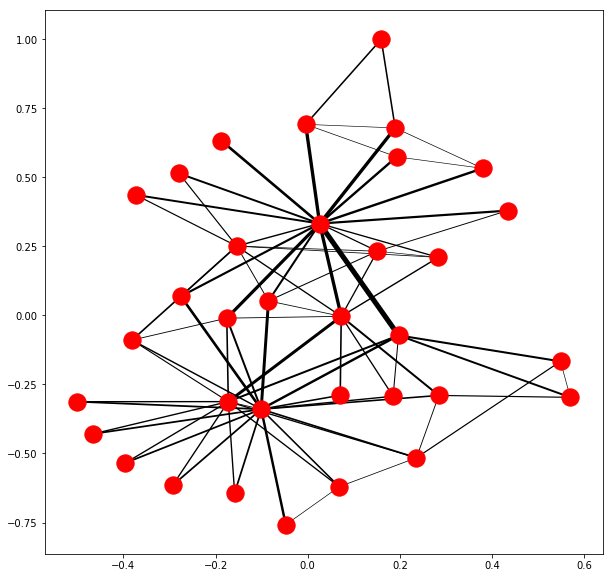

In [16]:
# Carreguem el graf del club de karate.
g = nx.karate_club_graph()

# Mostrem el graf, indicant-ne la centralitat amb l'amplària de l'aresta.
plt.figure(num=None, figsize=(10, 10))
ebc = nx.edge_betweenness_centrality(g, normalized=True)
draw_graph_edge_size_prop(g, ebc)

Podem comparar el resultat amb altres mètriques de centralitat d'arestes, per exemple, la centralitat basada en flux de corrent:

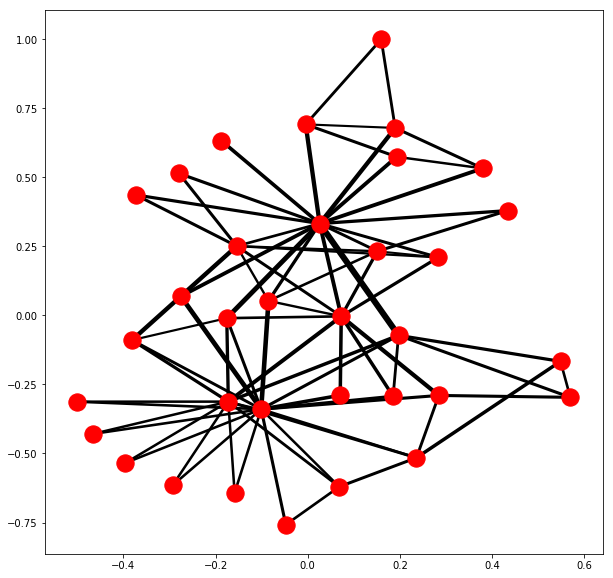

In [17]:
# Visualitzem la centralitat basada en el flux de corrent.
plt.figure(num=None, figsize=(10, 10))
ebc = nx.edge_current_flow_betweenness_centrality(g, normalized=True)
draw_graph_edge_size_prop(g, ebc)

## 3. Mètriques que descriuen les xarxes

### 3.1 Mesures d'agrupament

Hem vist que el coeficient d'agrupament s'utilitza per a descriure els nodes d'un graf. El coeficient d'agrupament mitjà dels nodes d'una xarxa s'usa per a descriure una xarxa i es pot calcular directament utilitzant la funció [`average_clustering`](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.average_clustering.html#networkx.algorithms.cluster.average_clustering) o bé calculant la mitjana dels valors de cada node. 

In [18]:
# Importem la llibreria numpy.
import numpy as np

# Calculem el coeficient d'agrupament mitjà de la xarxa.
print("Cálculo usando average_clustering: {}".format(nx.average_clustering(g6)))
print("Cálculo usando clustering: {}".format(np.mean(list(nx.clustering(g6).values()))))

Cálculo usando average_clustering: 0.5833333333333333
Cálculo usando clustering: 0.5833333333333333


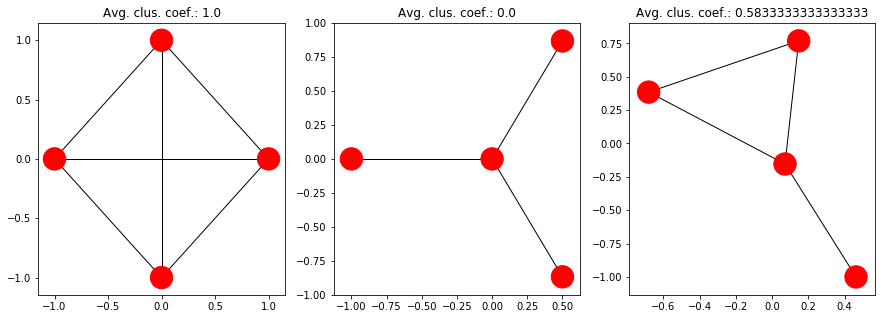

In [19]:
# Creem tres visualitzacions de tres grafs de quatre nodes diferents,
# indicant el coeficient d'agrupament mitjà en el títol de la figura.
# Nota: en aquest cas, la mida dels nodes és constant.

plt.figure(num=None, figsize=(15, 5))
       
ax = plt.subplot(1, 3, 1)
ax.set_title("Avg. clus. coef.: {}".format(nx.average_clustering(g4)))
draw_graph_node_size_prop(g4, {node: 1 for node in g4.nodes()})

ax = plt.subplot(1, 3, 2)
ax.set_title("Avg. clus. coef.: {}".format(nx.average_clustering(g5)))
draw_graph_node_size_prop(g5, {node: 1 for node in g5.nodes()})

ax = plt.subplot(1, 3, 3)
ax.set_title("Avg. clus. coef.: {}".format(nx.average_clustering(g6)))
draw_graph_node_size_prop(g6, {node: 1 for node in g6.nodes()})

Podem veure que el graf de l'esquerra té coeficient d'agrupament mitjà igual a 1, ja que tots els seus nodes tenen un cc d'1. D'una manera anàloga, el graf del mig té un cc mitjà de 0, ja que aquest és el valor del cc de tots els seus nodes. Finalment, el graf de la dreta té nodes amb cc diversos, que tenen una mitjana de 0,58.

### 3.2 Distàncies

En el PLA anterior hem vist algunes mètriques sobre distàncies que es podien utilitzar per a descriure una xarxa, com són el diàmetre, el radi i la mitjana de la longitud dels camins més curts.

In [20]:
# Carreguem el graf.
g = nx.karate_club_graph()
# Mostrem el diàmetre, el radi i la mitjana dels camins més curts entre parells de nodes.
print("El diàmetre del graf és: {}".format(nx.diameter(g)))
print("El radi del graf és: {}".format(nx.radius(g)))
print("La mitjana dels camins més curts del graf és: {}".format(nx.average_shortest_path_length(g)))

El diàmetre del graf és: 5
El radi del graf és: 3
La mitjana dels camins més curts del graf és: 2.408199643493761


Altres mètriques relacionades amb les distàncies que permeten descriure un graf són la mida del centre (el nombre de nodes que tenen excentricitat igual al radi) i la mida de la perifèria (el nombre de nodes amb excentricitat igual al diàmetre). Podem obtenir una llista dels nodes al centre i a la perifèria d'un graf usant les funcions [`center`](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.distance_measures.center.html#networkx.algorithms.distance_measures.center) i [`periphery`](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.distance_measures.periphery.html#networkx.algorithms.distance_measures.periphery), respectivament.

In [21]:
print("El nombre de nodes al centre és: {}".format(len(nx.center(g))))
print("El nombre de nodes a la perifèria és: {}".format(len(nx.periphery(g))))

El nombre de nodes al centre és: 8
El nombre de nodes a la perifèria és: 9


Podem visualitzar els nodes que es troben al centre i a la perifèria del graf del club de karate:

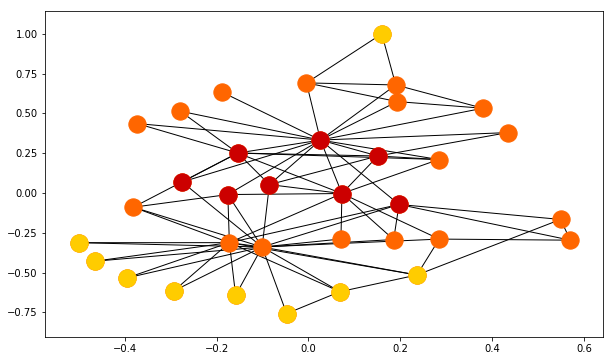

In [22]:
plt.figure(num=None, figsize=(10, 6))
pos = nx.kamada_kawai_layout(g)

# Mostrem tots els nodes en color taronja.
nx.draw_networkx_nodes(g,  pos=pos, node_color='#ff6600')
# Mostrem les arestes.
nx.draw_networkx_edges(g, pos=pos)

# Repintem els nodes del centre de color vermell.
nx.draw_networkx_nodes(g, pos=pos, nodelist=nx.center(g), node_color='#cc0000')
# Repintem els nodes de la perifèria de color groc.
nx.draw_networkx_nodes(g, pos=pos, nodelist=nx.periphery(g), node_color='#ffcc00')

### 3.3 Asortativitat

Una altra de les mètriques que podem usar per a descriure una xarxa és la seva asortativitat, és a dir, la tendència que mostren els nodes a connectar-se a altres nodes similars. En un graf amb asortativitat propera a 1, els nodes tendiran a connectar-se amb altres de similars, mentre que en un graf amb asortativitat propera a -1, la tendència dels nodes serà la de connectar-se amb altres nodes diferents a ells.

Podem calcular l'asortativitat en funció de qualsevol valor numèric o propietat categòrica dels nodes.

In [24]:
import random

g = nx.karate_club_graph()

# Calculem l'asortativitat en funció del grau.
deg_assort = nx.degree_assortativity_coefficient(g)
print("L'asortativitat en funció del grau és: {}".format(deg_assort))

# Calculem l'asortativitat en funció del club.
club_assort = nx.attribute_assortativity_coefficient(g, 'club')
print("L'asortativitat en funció del club es: {}".format(club_assort))

# Calculem l'asortativitat en funció d'una etiqueta que assignem aleatòriament.
nx.set_node_attributes(g, {node: random.randint(0,1) for node in g.nodes}, name='random_label')
r_assort = nx.attribute_assortativity_coefficient(g, 'random_label')
print("L'asortativitat en funció d'una etiqueta aleatòria és: {}".format(r_assort))

L'asortativitat en funció del grau és: -0.47561309768461457
L'asortativitat en funció del club es: 0.717530864197531
L'asortativitat en funció d'una etiqueta aleatòria és: -0.01715854495538779


Així, doncs, els nodes del club de karate presenten una tendència a connectar-se amb altres nodes del mateix club (l'asortativitat  és positiva) i amb nodes amb grau diferent (l'asortativitat  és negativa). A més, l'asortativitat  en funció d'una etiqueta és propera a 0, per la qual cosa els nodes no mostren cap tendència a connectar-se amb altres nodes en funció de l'etiqueta (ni a nodes amb l'etiqueta igual, ni a nodes amb l'etiqueta diferent).

## 4. Detecció de comunitats

### 4.1 Subestructures locals

Les subestructures locals que presenta una xarxa ens poden ser útils  tant per a caracteritzar les xarxes com per a estudiar les comunitats que aquesta presenta. Així, doncs, pel que fa a la caracterització de la xarxa, l'existència de certes subestructures a la xarxa, així com també les característiques d'aquestes subestructures, ens permeten descriure xarxes (igual que les mètriques que hem vist en l'apartat 3). D'altra banda, aquestes subestructures ens permeten identificar comunitats amb certes propietats de cohesió o connectivitat.

Una clica és un subgraf complet d'un graf, és a dir, un subgraf els nodes del qual estan connectats entre si dos a dos. La funció​ [`enumerate_all_cliques`](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.clique.enumerate_all_cliques.html#networkx.algorithms.clique.enumerate_all_cliques) ens permet obtenir totes les cliques d'un graf. 

In [25]:
# Carreguem el graf del club de karate.
g = nx.karate_club_graph()

# Obtenim totes les cliques i les ordenem per mida.
cliques_by_size = sorted(nx.enumerate_all_cliques(g), key=len, reverse=True)

# Mostrem el nombre de cliques que hem trobat.
print("Hi ha {} cliques en el graf".format(len(cliques_by_size)))

Hi ha 170 cliques en el graf


Visualitzem ara algunes de les cliques existents en el graf del club de karate. En concret, generarem 3 figures, mostrant 3 de les cliques més grans del graf:

In [26]:
# Definim una funció que mostri el graf, ressaltant alguns nodes  mitjançant el canvi de color
def draw_graph_node_color(g, nodes=[]):
    pos = nx.kamada_kawai_layout(g)
    # Mostrem les arestes.
    nx.draw_networkx_edges(g, pos=pos)
    # Mostrem tots els nodes en color taronja.
    nx.draw_networkx_nodes(g, pos=pos, node_color='#ff6600')
    # Repintem els nodes que volem destacar de color vermell.
    nx.draw_networkx_nodes(g, pos=pos, nodelist=nodes, node_color='#cc0000')
    # Mostrem les etiquetes dels nodes destacats.
    nx.draw_networkx_labels(g, pos=pos)
    

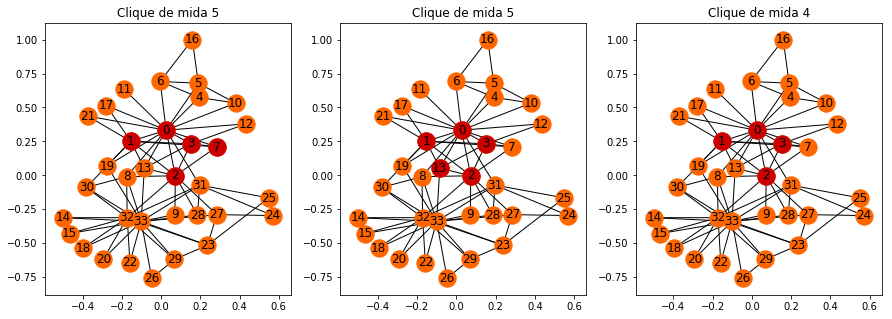

In [27]:
plt.figure(num=None, figsize=(15, 5))

# Mostrem la clique més gran.
ax = plt.subplot(1, 3, 1)
ax.set_title("Clique de mida {}".format(len(cliques_by_size[0])))
draw_graph_node_color(g, nodes=cliques_by_size[0])

# Mostrem la segona clique més gran.
ax = plt.subplot(1, 3, 2)
ax.set_title("Clique de mida {}".format(len(cliques_by_size[1])))
draw_graph_node_color(g, nodes=cliques_by_size[1])

# Mostrem la tercera clique més gran.
ax = plt.subplot(1, 3, 3)
ax.set_title("Clique de mida {}".format(len(cliques_by_size[2])))
draw_graph_node_color(g, nodes=cliques_by_size[2])


En aquest cas, el graf té dos cliques de 5 nodes. És interessant veure com el subconjunt de nodes [0, 1, 2] apareixen en les 3 cliques.

El nombre de nodes de la clica més gran d'un graf s’anomena nombre de clica (en anglès, *clique number*) i és un valor que s'utilitza per a descriure la xarxa. Si ja hem calculat totes les cliques d'un graf, podem obtenir el nombre de clica mirant el nombre de nodes de la clica més gran que hàgim trobat:

In [28]:
print("El nombre de nodes de la clique més gran és: {}".format(len(cliques_by_size[0])))

El nombre de nodes de la clique més gran és: 5


Networkx també disposa de funcions per a obtenir únicament la clica de grandària màxima, o bé el nombre de clica [`graph_clique_number`](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.clique.graph_clique_number.html#networkx.algorithms.clique.graph_clique_number):

In [29]:
from networkx.algorithms.approximation.clique import max_clique

print("La clique més gran és: {}".format(max_clique(g)))
print("El nombre de nodes de la clique més gran és: {}".format(len(max_clique(g))))
print("El nombre de clique és: {}".format(nx.graph_clique_number(g)))

La clique més gran és: {0, 1, 2, 3, 7}
El nombre de nodes de la clique més gran és: 5
El nombre de clique és: 5


Hi ha altres subestructures d'interès més enllà de les cliques. Per exemple, un k-core és un graf maximal que conté únicament nodes de grau com a mínim *k*. És a dir, cada node del k-core serà adjacent com a mínim a altres k nodes del k-core. Networkx ens permet calcular els k-cores d'un graf amb la funció  [`k_core`](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.core.k_core.html).

Hem trobat un 4-core
El 4-core té 10 nodes


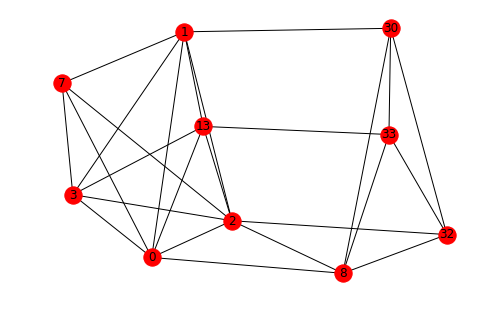

In [30]:
from networkx.algorithms.core import k_core

# Calculem el k-core amb més grau del graf.
kcore = k_core(g)

# Mostrem el k-core
nx.draw(kcore, with_labels=True)

# Mostrem el grau mínim del subgraf i el nombre de nodes del k-core.
k = min(dict(kcore.degree()).values())
print("Hem trobat un {}-core".format(k))
print("El {}-core té {} nodes".format(k, len(kcore.nodes())))

Hem trobat un 4-core, és a dir, un subgraf maximal en el qual tots els nodes del subgraf tenen, com a mínim, grau 4. És el k-core amb més k que podem trobar al graf: no hi ha cap k-core per a k més gran que 4. En canvi, sí que podríem trobar k-cores per a valors de k inferiors a 4.

In [31]:
# Intentem buscar un 5-core del graf, però no ho aconseguim.
k_core(g, 5).node()

NodeView(())

Hem trobat un 3-core
El 3-core té 22 nodes


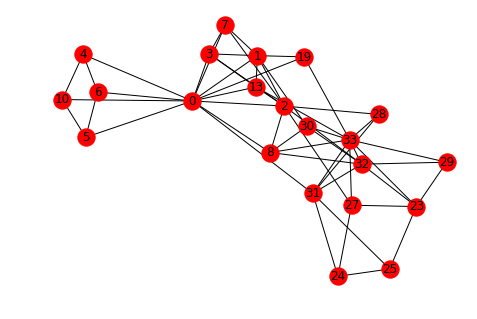

In [32]:
# Calculem el 3-core del graf.
kcore_3 = k_core(g, 3)

# Mostrem el 3-core.
nx.draw(kcore_3, with_labels=True)

# Mostrem el grau mínim del subgraf i el nombre de nodes del k-core.
k = min(dict(kcore_3.degree()).values())
print("Hem trobat un {}-core".format(k))
print("El {}-core té {} nodes".format(k, len(kcore_3.nodes())))

### 4.2 Algorismes de detecció de comunitats i avaluació de comunitats

Networkx incorpora diferents algorismes de detecció de comunitats. Vegem com podem usar-los per a detectar comunitats i avaluar-les. 

En primer lloc, farem una nova versió de la funció de dibuix de grafs, que ens mostrarà els nodes en colors diferents segons la comunitat a la qual pertanyen.

In [33]:
# Definim una funció que mostri el graf, mostrant cada grup de nodes amb un color diferent.
def draw_graph_node_colors(g, nodes=[]):
    pos = nx.kamada_kawai_layout(g)
    # Mostrem les arestes.
    nx.draw_networkx_edges(g, pos=pos)
    cmap = plt.cm.hsv
    for i, group in enumerate(nodes):
        # Mostrem els nodes del grup.
        nx.draw_networkx_nodes(g, pos=pos, nodelist=group, node_color=cmap(i/len(nodes)))

Apliquem l'algorisme de Clauset-Newman-Moore de detecció de comunitats, que incorpora networkx al graf del club de karate:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


S'han detectat 3 comunitats: 
	Comunitat 0 (17 nodes):	[32, 33, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
	Comunitat 1 (9 nodes):	[1, 2, 3, 7, 9, 12, 13, 17, 21]
	Comunitat 2 (8 nodes):	[0, 4, 5, 6, 10, 11, 16, 19]


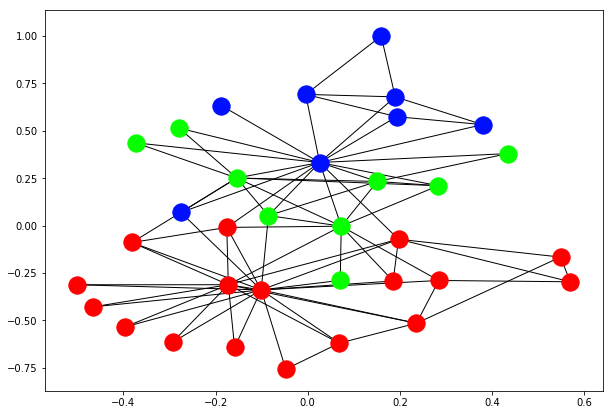

In [35]:
from networkx.algorithms.community import modularity_max as nxmod

g = nx.karate_club_graph()
# Detectem comunitats en el graf de karate amb l'algorisme de Clauset-Newman-Moore:
com_mod = nxmod.greedy_modularity_communities(g)
# Mostrem les comunitats detectades.
plt.figure(num=None, figsize=(10, 7))
draw_graph_node_colors(g, com_mod)
print("S'han detectat {} comunitats: ".format(len(com_mod)))
for i, c in enumerate(com_mod):
    print("\tComunitat {} ({} nodes):\t{}".format(i, len(c), list(c)))

L'algorisme detecta 3 comunitats, una d'elles amb 17 nodes i dos d'elles més petites de 8 i 9 nodes, respectivament. 
Networkx incorpora també altres algorismes de detecció de comunitats, com per exemple, el de Girvan Newman. Vegem les particions que obtenim usant aquest algorisme:


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


S'han detectat 2 comunitats: 
	Comunitat 0 (15 nodes):	[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21]
	Comunitat 1 (19 nodes):	[32, 33, 2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


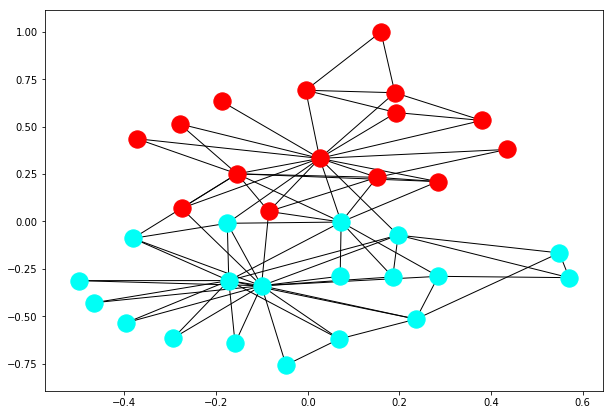

In [36]:
from networkx.algorithms import community as nxcom

# Obtenim una divisió en comunitats amb Girvan Newman.
coms_gn = nxcom.girvan_newman(g)
one_part_gn = next(coms_gn)

# Mostrem les comunitats gràficament.
plt.figure(num=None, figsize=(10, 7))
draw_graph_node_colors(g, one_part_gn)
print("S'han detectat {} comunitats: ".format(len(one_part_gn)))
for i, c in enumerate(one_part_gn):
    print("\tComunitat {} ({} nodes):\t{}".format(i, len(c), list(c)))
    

Podem usar la modularitat per a mesurar si la partició en comunitats que hem trobat és bona. Per a això, farem ús de la llibreria `python-louvain`, que s'importa com a `community` a Python (encara que el nom de la llibreria a `pip` és `python-louvain`). Observeu que anteriorment hem importat el mòdul `community` de `networkx` com a `nxcom` per a evitar confusions a l'hora d'usar ambdues llibreries.

In [37]:
# Importem la llibreria community.
import community

# Definim una funció que canvia el format de descripció de comunitats: de llista de llistes de nodes
# a diccionari
def comm_list_to_dict(comm_list):
    return {node: i for i, communit in enumerate(comm_list) for node in communit}

# Calculem la modularitat de les comunitats detectades amb l'algorisme de Clauset-Newman-Moore,
# canviant primer el format de representació de les comunitats.
mod_gmc = community.modularity(comm_list_to_dict(com_mod), g)
print("La modularitat de les comunitats calculades amb greedy_modularity_communities és: " + str(mod_gmc))

# Calculem la modularitat de les comunitats detectades amb l'algorisme de Girvan Newman.
mod_gmc = community.modularity(comm_list_to_dict(one_part_gn), g)
print("La modularitat de les comunitats calculades amb girvan_newman és: " + str(mod_gmc))

La modularitat de les comunitats calculades amb greedy_modularity_communities és: 0.3806706114398422
La modularitat de les comunitats calculades amb girvan_newman és: 0.35996055226824464


Vegem si podem obtenir alguna partició en comunitats una mica millor (avaluant-la a partir de la modularitat). `Community` incorpora un algorisme que intenta trobar la millor divisió en comunitats considerant la modularitat com a mètrica que cal optimitzar:

In [38]:
# Calculem les particions amb best_partition, algorisme que té com a objectiu maximitzar
# la modularitat
part = community.best_partition(g)
mod = community.modularity(part, g)

print("La modularitat és: " + str(mod))

La modularitat és: 0.4188034188034188


Com hem vist en el llibre *Análisis de datos de redes sociales*, alguns algorismes de detecció de comunitats (per exemple l'algorisme de Girvan Newman) són algorismes jeràrquics. Això implica que ens proporcionen diferents particions de la xarxa, a diferents nivells. Ara analitzarem les comunitats que detecta l'algorisme de Girvan Newman a tots els possibles nivells de la jerarquia i farem una funció que ens retornarà la millor partició que troba aquest algorisme:

In [39]:
from copy import copy

# Definim una funció que busca la millor participació, segons la modularitat, amb Girvan Newman.
def best_partition_with_girvan_newman(g):
    
    # Detectem les comunitats.
    coms_per_level = nxcom.girvan_newman(g)
    
    # Seleccionem el millor nivell.
    max_mod, m_level, m_numcoms, m_coms = float('-inf'), None, None, None
    for level, communities in enumerate(coms_per_level):
        print("Hi ha {} comunitats en el nivell {}".format(len(communities), level))
        print("amb nombre de nodes: {}".format([len(com) for com in communities]))
        d = {node: i for i, com in enumerate(communities) for node in com}
        m = community.modularity(d, g)
        print("La modularitat és: {}".format(m))
        if m > max_mod:
            max_mod = m
            m_level = level
            m_numcoms = len(communities)
            m_coms = copy(communities)
        print("----")

    print("\nModularitat màxima: {} ({} comunidatats, nivell {})".format(max_mod, m_numcoms, m_level))
    print(m_coms)

In [40]:
best_partition_with_girvan_newman(g)

Hi ha 2 comunitats en el nivell 0
amb nombre de nodes: [15, 19]
La modularitat és: 0.35996055226824464
----
Hi ha 3 comunitats en el nivell 1
amb nombre de nodes: [15, 18, 1]
La modularitat és: 0.34878369493754113
----
Hi ha 4 comunitats en el nivell 2
amb nombre de nodes: [10, 18, 5, 1]
La modularitat és: 0.3632478632478633
----
Hi ha 5 comunitats en el nivell 3
amb nombre de nodes: [10, 6, 5, 12, 1]
La modularitat és: 0.40129848783694944
----
Hi ha 6 comunitats en el nivell 4
amb nombre de nodes: [9, 6, 5, 12, 1, 1]
La modularitat és: 0.3925049309664695
----
Hi ha 7 comunitats en el nivell 5
amb nombre de nodes: [9, 6, 5, 11, 1, 1, 1]
La modularitat és: 0.3762327416173571
----
Hi ha 8 comunitats en el nivell 6
amb nombre de nodes: [8, 6, 5, 11, 1, 1, 1, 1]
La modularitat és: 0.35831689677843537
----
Hi ha 9 comunitats en el nivell 7
amb nombre de nodes: [8, 6, 5, 10, 1, 1, 1, 1, 1]
La modularitat és: 0.341715976331361
----
Hi ha 10 comunitats en el nivell 8
amb nombre de nodes: [8, 6

Així, doncs, la modularitat més gran s'aconsegueix amb la partició en el nivell 3, que consta de 5 comunitats amb 10, 6, 5, 12 i 1 node, respectivament.

Finalment, vegem com s'han anat generant les comunitats per mitjà de diferents iteracions (que donen lloc a les particions a diferents nivells):

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

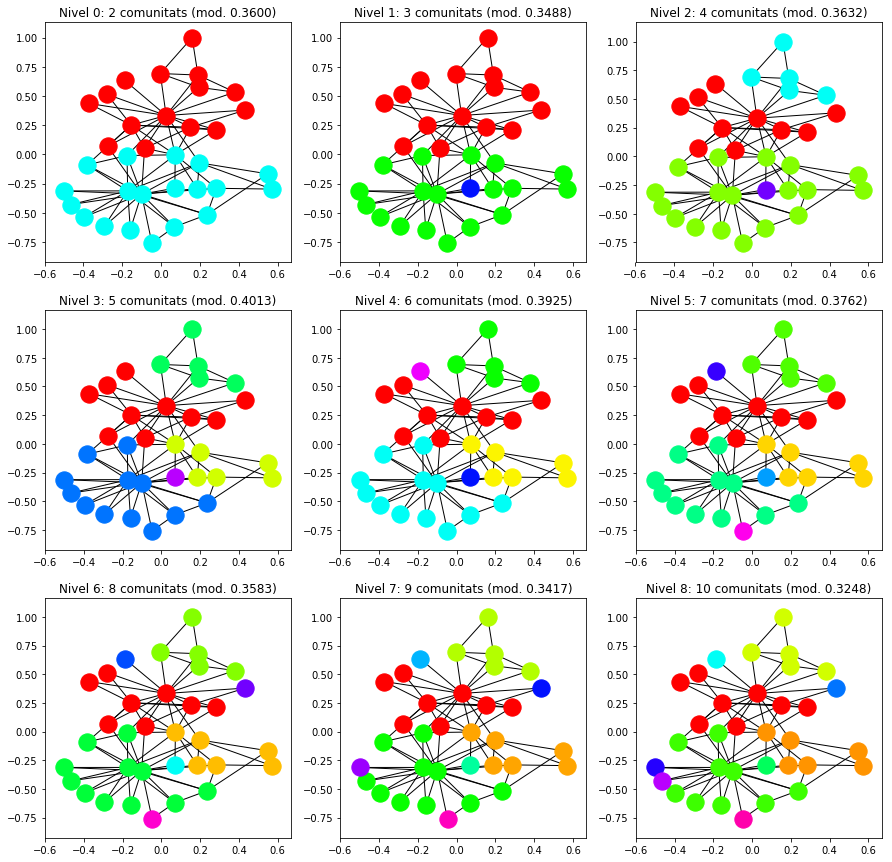

In [41]:
plt.figure(num=None, figsize=(15, 15))

# Detectem les comunitats.
coms_per_level = nxcom.girvan_newman(g)
    
# Mostrem els 10 primers nivells.
for r in range(1, 10):
    ax = plt.subplot(3, 3, r)
    communities = next(coms_per_level)
    m = community.modularity(comm_list_to_dict(communities), g)
    draw_graph_node_colors(g, communities)
    ax.set_title("Nivel {}: {} comunitats (mod. {:.4f})".format(r-1, len(communities), m))